<a href="https://colab.research.google.com/github/RedPanda54/Study/blob/main/Theme%2003.%20%EC%B5%9C%EB%8C%80%20%EA%B5%AC%EA%B0%84%EC%9D%98%20%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **최대 구간의 합**

(문제)<br>
<div>수많은 군소 국가들이 난립하던 시기에 광개토대왕이 나타나서 세계를 정복했다. 광개토대왕의 부하로는 심복장군이 있었는데, 광개토대왕은 세계를 정복한 후에 심복장군에게도 일부의 땅을 하사하기로 했다.</div>
<div>
광개토대왕은 자신이 정복한 세계를 가로 한 줄의 격자 모양의 구역으로 나누었고, 각각의 구역에 있는 숫자는 각 구역에서 걷히는 세금을 나타낸다. 심복장군은 이 구역들 중에서 <b>임의의 연속된 구간</b>을 하사 받을 수 있다. 욕심이 많은 심복장군은 세금이 가장 많이 걷히는 구간을 받으려고 한다.</div><br>
<ul>
<li>입력
    <ol>
        <li>첫 줄에 격자의 가로 길이 col이 주어진다. (1 <= col <= 100)</li>
        <li>두 번째 줄에는 col개의 정수들이 주어진다.</li>
        <ul>
            <li>각 구역에서 걷힌 세금을 의미하며, -99 ~ 99 사이의 정수이다.</li>
            <li>각 숫자의 뒤에는 한 개의 공백이 있다.</li>
    </ol>
<li>출력</li>
    <ul>
        <li>심복장군이 세금을 최대로 걷을 수 있도록 구간을 선택했을 때, 그 최대 세금을 출력하라.</li>
        <li>모든 구역의 세금이 음수라면, 정답도 음수일 수 있다. 즉, 땅을 하사 받는 것을 포기하는 것은 불가능하다.</li>
    </ul>
</ul>

(예시) <br>
만약에 [-1, 6, -4, 2, -1 15, -9, 7]에서 선택한다고 하면, 6에서 15의 연속 구간을 구하면 심복장군이 18의 최대 이익을 가질 수 있다.

In [1]:
# easy 버전
col = int(input())
a = [0] * col

a = list(map(int, input().split()))
max_val = -100 * 10000

for i in range(0, col):
	sum_val = 0
	for j in range(i, col):
		sum_val += a[j]
		max_val = max(max_val, sum_val)
print(max_val)


8
-1 6 -4 2 -1 15 -9 7
18


**Medium 버전**

입력의 크기가 바뀌었다.<br>
col => (1 <= col <= **1,000,000**)<br>

In [2]:
# medium 버전
col = int(input())
a = [0] * col

a = list(map(int, input().split()))
max_val = -100 * 10000
sum_val = 0

for i in range(0, col):
    # i번째 숫자에서 끝나는 구간의
    # 최대합이 sum_val에 저장됨
    sum_val += a[i]
    max_val = max(max_val, sum_val)

    # 0보다 작으면 버린다.
    sum_val = max(0, sum_val)
print(max_val)

100
89 -43 27 73 82 46 -3 62 19 52 16 -87 42 -88 41 74 3 84 83 40 -93 -71 -22 -44 -85 24 68 65 -77 17 88 -59 37 -51 92 -47 39 79 -66 48 -13 -33 96 69 26 13 21 -60 -63 86 72 10 -38 -14 -50 -94 30 53 -20 58 75 -70 -9 54 76 49 -28 -32 90 -98 29 -23 4 61 34 -6 91 -80 55 7 81 -45 85 64 36 -57 12 25 99 -7 97 -34 -1 95 -29 -90 5 -82 -86 11 18 
1432


Hard 버전

심복장군이 받을 수 있는 구간이 가로 한 줄에서 **직사각형**의 구간으로 늘어났다.

<ul>
<li>입력
    <ol>
        <li>첫 줄에 <b>격자의 세로 길이 row와 가로 길이 col</b>이 주어진다. (1 <= row, col <= 200)</li>
        <li>두 번째 줄에는 col개의 정수들이 주어진다.</li>
        <ul>
            <li>각 구역에서 걷힌 세금을 의미하며, -99 ~ 99 사이의 정수이다.</li>
            <li>각 숫자의 뒤에는 한 개의 공백이 있다.</li>
    </ol>
<li>출력</li>
    <ul>
        <li>심복장군이 세금을 최대로 걷을 수 있도록 구간을 선택했을 때, 그 최대 세금을 출력하라.</li>
        <li>모든 구역의 세금이 음수라면, 정답도 음수일 수 있다. 즉, 땅을 하사 받는 것을 포기하는 것은 불가능하다.</li>
    </ul>
</ul>

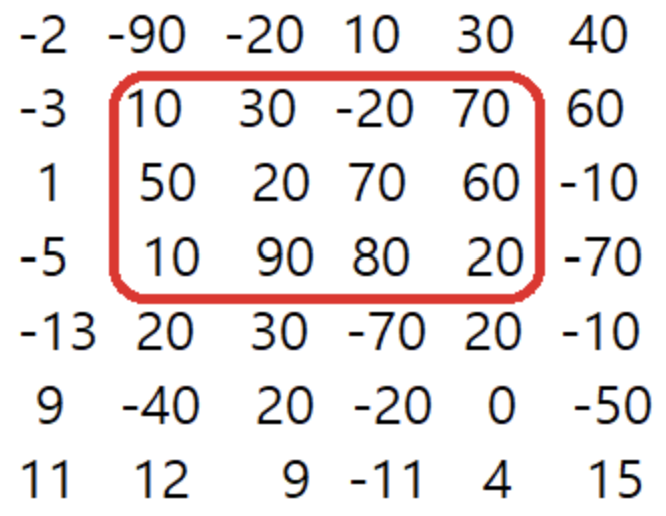

위와 같이 직사각형 형태의 구간을 선택하면, 걷을 수 있는 세금은 총 490이 된다.

In [1]:
# hard 버전
# 시간 복잡도는 O(n^3)

# 입력
row, col = map(int, input().split())
s = []
for _ in range(row):
	s.append(list(map(int, input().split())))

for i in range(row):
	current_sum = 0
	for j in range(1, col):
		s[i][j] = s[i][j] + s[i][j-1]

max_sum = float('-inf')
for left in range(0, col):
	for right in range(left, col):
		current_sum = 0
		for r in range(0, row):
			if left == 0:
				current_sum += s[r][right]
			else:
				current_sum += (s[r][right] - s[r][left-1])

			max_sum = max(max_sum, current_sum)
			current_sum = max(0, current_sum)	# 0 이하의 current_sum은 버그의 원인이 될 수도 있으니 버린다.

print(max_sum)


7 6
-2 -90 -20 10 30 40
-3 10 30 -20 70 60
1 50 20 70 60 -10
-5 10 90 80 20 -70
-13 20 30 -70 20 -10
9 -40 20 -20 0 -50
11 12 9 -11 4 15
490
